## Importing required libraries

In [319]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt


## Loading Iris dataset

In [320]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["Species"] = iris.target
X = iris.data
y = iris.target
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Handling Outliers

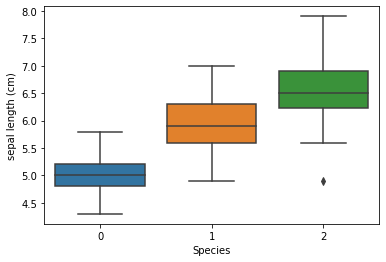

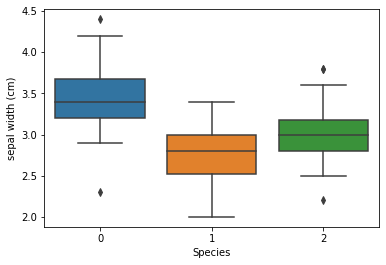

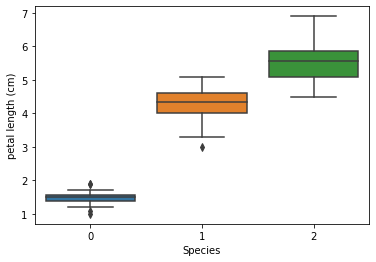

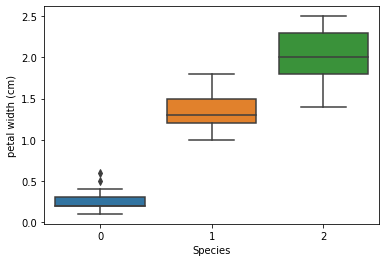

In [321]:
for i in range(4):
    plt.figure()
    sns.boxplot(data=df,y=df.columns[i],x=df["Species"])

In [322]:
for column in df.columns[0:-1]:
    for specy in df["Species"].unique():
        Specy_type = df[df["Species"] == specy]
        Selected_column = Specy_type[column]

        Q1 = Selected_column.quantile(0.25)
        Q3 = Selected_column.quantile(0.75)

        IQR = Q3 - Q1

        lower_lmt = Q1 - (1.5*IQR)
        upper_lmt = Q3 + (1.5 * IQR)

        outliers = Selected_column[((Selected_column > upper_lmt) | (
            Selected_column < lower_lmt))].index  # picking outliers' indexes

        df.drop(index=outliers, inplace=True)  # dropping outliers
        print(column, iris.target_names[specy], len(outliers))


sepal length (cm) setosa 0
sepal length (cm) versicolor 0
sepal length (cm) virginica 1
sepal width (cm) setosa 2
sepal width (cm) versicolor 0
sepal width (cm) virginica 0
petal length (cm) setosa 1
petal length (cm) versicolor 1
petal length (cm) virginica 0
petal width (cm) setosa 2
petal width (cm) versicolor 0
petal width (cm) virginica 0


## Naive Bayes Classification Modal

In [323]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.2)


In [324]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test_copy = X_test.copy()
X_test = sc.transform(X_test)


In [325]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB()

In [326]:
y_pred = classifier.predict(X_test)
y_pred


array([2, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2])

## Prediction Results

In [327]:
predictions = pd.DataFrame(X_test_copy, columns=iris.feature_names)
predictions["Actual"] = [iris.target_names[i] for i in y_test]
predictions["Predicted"] = [iris.target_names[i] for i in y_pred]
predictions


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Actual,Predicted
0,6.4,2.8,5.6,2.1,virginica,virginica
1,5.7,3.8,1.7,0.3,setosa,setosa
2,7.4,2.8,6.1,1.9,virginica,virginica
3,7.6,3.0,6.6,2.1,virginica,virginica
4,7.3,2.9,6.3,1.8,virginica,virginica
5,6.0,2.9,4.5,1.5,versicolor,versicolor
6,6.0,2.7,5.1,1.6,versicolor,versicolor
7,5.8,4.0,1.2,0.2,setosa,setosa
8,5.4,3.9,1.7,0.4,setosa,setosa
9,6.3,2.8,5.1,1.5,virginica,versicolor


## Confusion Matrix

<AxesSubplot:>

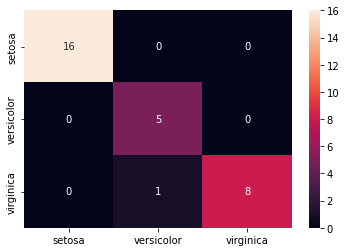

In [328]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=iris.target_names,
            yticklabels=iris.target_names)


## Modal Evalutation Metrics

In [329]:
from sklearn.metrics import classification_report
met = classification_report(
    y_test, y_pred, target_names=iris.target_names, output_dict=True)

In [330]:
Error_rate = 1-met["weighted avg"]["precision"]
Accuracy = met["accuracy"]
Precision = met["weighted avg"]["precision"]
Recall = met["weighted avg"]["recall"]


In [331]:
data = [
    ["Accuracy", Accuracy],
    ["Precision", Precision],
    ["Error Rate", Error_rate],
    ["Recall", Recall]
]
table = pd.DataFrame(data, columns=["Metric", "Value"])
table


,Metric,Value
0,Accuracy,0.966667
1,Precision,0.972222
2,Error Rate,0.027778
3,Recall,0.966667
